Take this dataset: https://www.kaggle.com/felipeesc/shark-attack-dataset(opens in a new tab). Use all the skills you've learned up until now to answer the following questions as well as possible. 

1 What are the most dangerous types of sharks to humans? 
  **WHITE SHARKS, omdat zij de meeste (fatale) aanvallen hebben (Tiger Shark is tweede)**

2 Are children more likely to be attacked by sharks? **Nee, het percentage kinderen dat is aangevallen, is beduidend lager dan het percentage volwassenen. Echter is de groep waarvan we niet weten in welke leeftijdscategorie het behoort, zo groot, dat de kans op foute conclusies hier aanwezig is**

3 Are shark attacks where sharks were provoked more or less dangerous? **Het lijkt erop, minder gevaarlijk. Er zijn er een stuk minder van, maar percentueel blijkt dat er bij de 'provoked' minder fatale aanvallen waren**

4 Are certain activities more likely to result in a shark attack? **Swimming, direct gevolgd door Surfing en in iets mindere mate Fishing, zijn de activiteiten die het meest vaak resulteren in een shark attack**

If you feel you can't answer a question based on the dataset alone, feel free to find other datasets and use them in answering the questions.

For each answer you give not only answer the question but also write about the assumptions you made in answering the question. If an assumption or decision possibly created a bias please write about this as well.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
from google.colab import files

%load_ext google.colab.data_table

In [ ]:
uploaded = files.upload()

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['attacks.csv']),encoding='ISO-8859-1')
df.drop(["Case Number","Name","Sex ","Investigator or Source","pdf","href formula","href","Case Number.1","Case Number.2","Unnamed: 22","Unnamed: 23"], inplace=True, axis=1)
df.rename(columns={"Fatal (Y/N)" : "Fatal", "Species " : "Species"},inplace=True)
df.columns

In [5]:
#CHECK UNIEKE WAARDEN
def unieke_waarden_per_kolom(col):
  print(f'----{col}----')
  display(df.loc[:,col].unique())
  num_unique_values = len(df.loc[:,col].unique())
  if num_unique_values == len(df.loc[:,col]):
    print(f"Each value in the column is unique (total: {num_unique_values})")
  else:
    print(f"Aantal unieke waarden: {num_unique_values}, per {len(df.loc[:,col])} rijen")



In [6]:
#SORTEER EN KIJK NAAR DE RANDGEVALLEN
def look_at_edges(col):
  # inner function
  def show_head_and_tail(values):
      num_items_to_slice = 10
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])

  print(f"----{col}----")
  column = df[col]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print("Unieke waarden gesorteerd, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error:
      print(f"Kan waarden niet sorteren: {error}")
      print("..dus laten we de NULL waarden proberen te filterenen dan sorteren")
      non_null_uniques = df.loc[~df[col].isnull(), col].unique()
      sorted = np.sort(non_null_uniques)
      show_head_and_tail(sorted)

In [7]:
#CAST NAAR TYPE
def cast_to_type(column, maybe_type):
  try:
    column.astype(maybe_type)
    print(f"Casting to {maybe_type} was successful")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}")


Onderzoek naar missing values

In [ ]:
# 1 What are the most dangerous types of sharks to humans?
# Species afzetten tegen aantal attacks per jaar
# En Species afzetten tegen Fatal (Y/N)
# Deze kolommen bekijken op missing values
for col in ["Species","Fatal","Year"]:
  unieke_waarden_per_kolom(col)

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 60)
#alvast FREQUENTIE CHECK enkelingen (hoe vaak 'M' voorkomt bij Fatal)
display(df['Fatal'].value_counts())
#alvast FREQUENTIE CHECK enkelingen (0 125x)
display(df['Year'].value_counts())

In [ ]:
for col in ["Species","Fatal","Year"]:
  look_at_edges(col)

In [ ]:
cast_to_type(df["Species"],"string")
cast_to_type(df["Fatal"],"string")
cast_to_type(df["Year"],"float64")

Aanpassen van gevonden 'niet generieke' Null waarden

In [9]:
#Aantal rijen totaal: 25.723
#Species origineel al 22259 NULL waarden
df["Species"] = df["Species"].replace({np.nan : None})
df["Species"] = df["Species"].replace({' ' : None})
df["Species"] = df["Species"].replace({'\xa0 ' : None, 'Questionable' : None, 'Invalid' : None , 'Shark involvement prior to death not confirmed' : None})
df["Species"] = df["Species"].replace({'Shark involvement prior to death was not confirmed' : None, 'Shark involvement prior to death unconfirmed' : None})
df["Species"] = df["Species"].replace({'Invalid incident' : None , 'Shark involvement not confirmed' : None, 'Questionable incident' : None , 'No shark involvement' : None})
df["Species"] = df["Species"].replace({"Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable" : None})

#Bij Fatal: spaties weghalen bij de N waarden, M verandert naar N (aanname typfout, komt maar 1x voor, geen bias. 71 UNKNOWN, 1 M, 1 2017)
#Fatal origineel al 19960 NULL waarden
df["Fatal"] = df["Fatal"].replace({np.nan : None , 'M' : 'N', ' N' : 'N' , 'N ' : 'N', 'y' : 'Y' , 'UNKNOWN' : None , '2017' : None})

#Bij Year, vooralsnog geen aanpassing op jaar 0, 5 etc., attacks zijn wel geweest, periode alleen niet zeker: 
#Year origineel al 19423 NULL waarden

In [ ]:
#FREQUENTIE CHECK
for col in ["Species","Fatal","Year"]:
  display(df[col].value_counts(dropna=False))

Text(0.5, 1.0, 'Species with fatal attacks over all years')

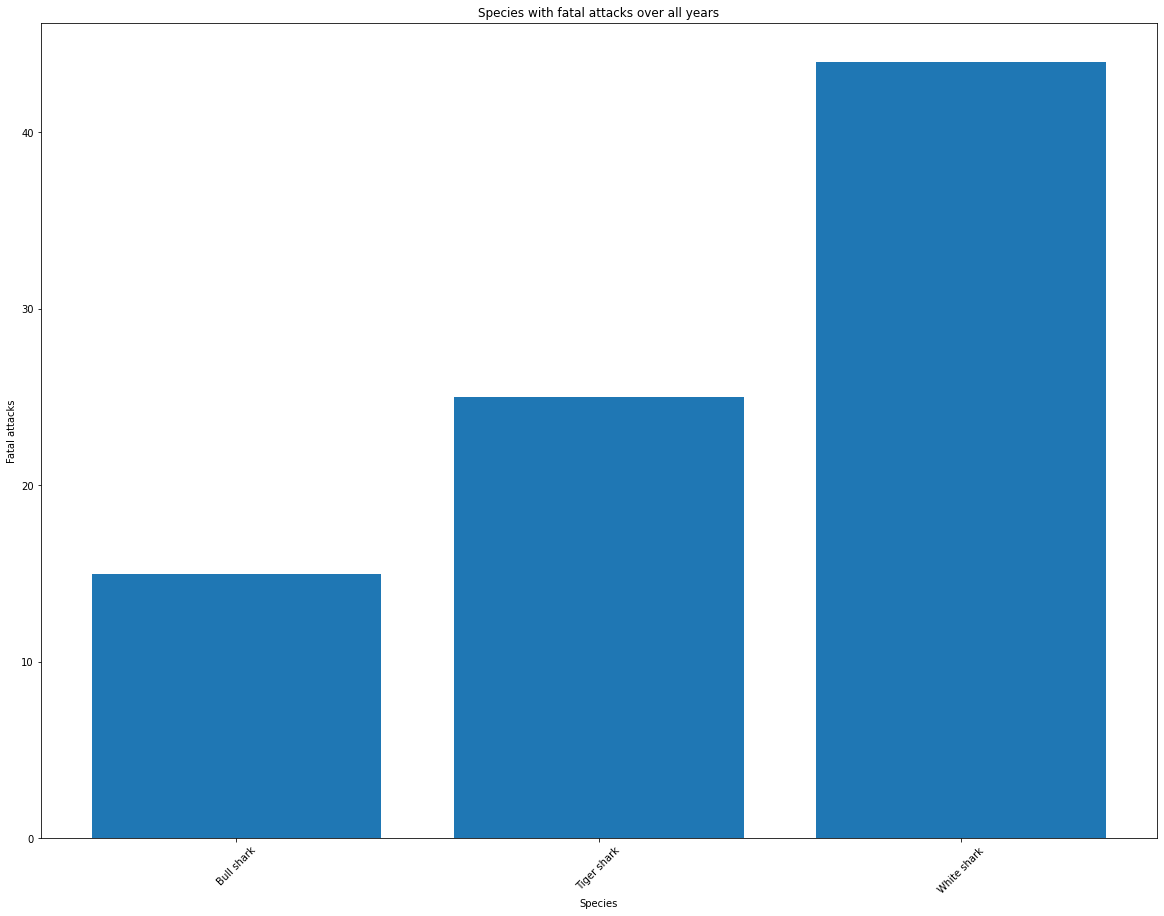

In [10]:
#De kolom Species bevat niet handig te vergelijken gegevens en ook niet altijd het type shark
df["Species"]
#Voor de vraag welke species het meest gevaarlijk zijn, hebben we niets aan de rijen, waar Species geen waarde hebben, we maken een nieuwe df zonder deze waarden
df_tmp = df.dropna(subset=["Species"]).copy()
df_tmp["Species"].value_counts()

#We starten met het maken van alles lower case, om deze in ieder geval te kunnen groeperen waar de verschillen alleen hierom gaan
df_tmp.loc["Species"] = df_tmp["Species"].str.lower()
df_tmp["Species"].value_counts()
#Het is al duidelijk dat de WHITE SHARK de meeste aanvallen heeft op mensen
#We zetten de Species nog even af op fatale incidenten

# We maken een extra kolom met waarde 1 als Fatal is True en anders 0
df_tmp["FatalInt"] = df["Fatal"].apply(lambda row: 1 if row == 'Y' else 0)  
grouped = df_tmp.groupby("Species").sum()

#We hoeven alle 0 en 1 waarden niet te zien:
# greaterthan1 = grouped["FatalInt"] > 1
# grouped = grouped[greaterthan1]

#Ook even boven 10 checken:
greaterthan1 = grouped["FatalInt"] > 10
grouped = grouped[greaterthan1]

# display(grouped.index)
fig, ax = plt.subplots()
x = grouped.index
y = grouped.loc[:,"FatalInt"]

ax.bar(x, y)
ax.set_xlabel("Species")
plt.xticks(rotation = 45) 
ax.set_ylabel("Fatal attacks")
fig.set_size_inches(20,15)
ax.set_title("Species with fatal attacks over all years")

In [ ]:
# 2 Are children more likely to be attacked by sharks?
#Hiervoor moet ik ook de kolom Age nog onderzoeken
unieke_waarden_per_kolom("Age")
look_at_edges("Age")
cast_to_type(df["Age"],"float64")
display(df["Age"].value_counts(dropna=False))

In [12]:
#interpratie die verschil weergeeft kind / niet kind, bij geen idee; -1
df["Age"] = df["Age"].replace({"18 months" : 1, "Teen" : 12 , "teen" : 12 , "28 & 26" : 27,'\xa0 ' : -1,' ': -1,'13 or 14':13,'18 or 20':20})
df["Age"] = df["Age"].replace({'30 or 36' : 33,'6½':6,'21 & ?':21,'33 or 37':35,'mid-30s':35,'23 & 20':22,'20?':20,"60's":60, '32 & 30':31,'12 or 13':12})
df["Age"] = df["Age"].replace({'16 to 18' : 17, 'Elderly' : 25, 'mid-20s':25,'Ca. 33':33, '21 or 26':23,'>50':52, '18 to 22': 20, 'adult':30})
df["Age"] = df["Age"].replace({'9 & 12' : 10,'? & 19':19, '9 months':0,'25 to 35':30, '23 & 26':24,'(adult)':30,'33 & 37':35,'25 or 28':26,'7      &    31':7})
df["Age"] = df["Age"].replace({'37, 67, 35, 27,  ? & 27' : 35,'21, 34,24 & 35':30,'30 & 32':31,'50 & 30':40, '17 & 35':20,'X':-1, '"middle-age"':50})
df["Age"] = df["Age"].replace({'13 or 18':15,'34 & 19':25,'33 & 26':30,'2 to 3 months':0,'MAKE LINE GREEN':-1,'"young"':10,'7 or 8':7, '17 & 16':16})
df["Age"] = df["Age"].replace({'F':-1,'Both 11':11,'9 or 10':9,'young':10,'36 & 23':30,'A.M.':-1,'?    &   14':14,'10 or 12':10,'31 or 33':31,'2½':2})
df["Age"] = df["Age"].replace({'28, 23 & 30':25,'Teens':10,'36 & 26':30,'8 or 10':8,'30s':30,'50s':50,'46 & 34':40,'  ':-1,'  ':40,'40s':40,'20s':20,'60s':60})
df["Age"] = df["Age"].replace({np.nan:-1})

# veel whitespaces, deze eerst weghalen
df["Age"].str.strip()
df["Age"]

#Probeer het type naar een int te casten
df = df.astype({"Age":"int"})

In [ ]:
df["Age"].dtype #int64 akkoord

Text(0.5, 1.0, 'Percentage attacks per leeftijdsgroep')

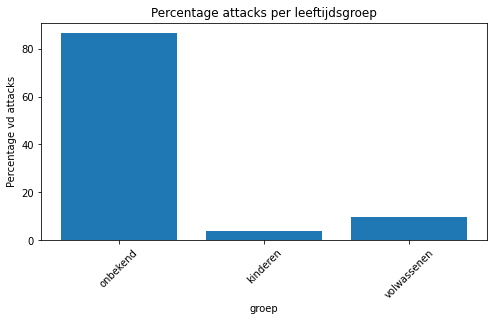

In [13]:
#van de -1 kolommen weten we de leeftijden niet, die houden we (deels) uit deze analyse - gelden wel mee voor percentage
df_age_tmp = df[~(df["Age"]==-1)] # aantal -1 = 22259
#totaal aantal attacks
aantal_rijen = len(df["Age"])
#percentages berekenen
aantal_volwassenen = (df_age_tmp["Age"]>=18).sum()
aantal_kinderen = (df_age_tmp["Age"]<18).sum()
# print(aantal_rijen) #25723
# print(aantal_volwassenen) #2521
# print(aantal_kinderen) #943
aantallen = np.array([22259,aantal_kinderen,aantal_volwassenen])

#Plot de percentages
fig, ax = plt.subplots()
x = ["onbekend","kinderen","volwassenen"]
y = (aantallen/aantal_rijen)*100

ax.bar(x, y)
ax.set_xlabel("groep")
plt.xticks(rotation = 45) 
ax.set_ylabel("Percentage vd attacks")
fig.set_size_inches(8,4)
ax.set_title("Percentage attacks per leeftijdsgroep")

In [ ]:
#3 Are shark attacks where sharks were provoked more or less dangerous?
#Hiervoor moet ik ook de kolom Type nog onderzoeken
unieke_waarden_per_kolom("Type")
look_at_edges("Type")
cast_to_type(df["Type"],"float64")
display(df["Type"].value_counts(dropna=False))


In [15]:
#Alles met Boat.. is None, NaN is None, Invalid is None...
dfcopy = df.copy()

dfcopy.loc[~(dfcopy['Type'].str.contains('rovoked', case=False, na=False)), 'Type'] = None
display(dfcopy.loc[:,"Type"].unique())

array([None, 'Unprovoked', 'Provoked'], dtype=object)

In [ ]:
#Hiervoor moet ik ook de kolom Injury nog onderzoeken
unieke_waarden_per_kolom("Injury")
look_at_edges("Injury")
cast_to_type(df["Injury"],"string")
display(df["Injury"].value_counts(dropna=False))

#Er zitten float waardes tussen
cast_to_type(dfcopy["Injury"],"string")

In [ ]:
#Bij Injury staat ook regelmatig 'PROVOKED INCIDENT'
#Ik ga ervan uit, dat als hij hier in capitals staat, dit ook zo is, Type zonodig aanpassen
def isProvoked(injury):
  if pd.isna(injury):
    #print("FALSE")
    return False
  elif injury.find('PROVOKED INCIDENT') >= 0:
    #print(injury)
    return True

display(dfcopy["Type"].value_counts())
dfcopy["Type"] = dfcopy.apply(lambda row: 'Provoked' if isProvoked(row["Injury"])==True else row["Type"],axis=1)
display(dfcopy["Type"].value_counts())

In [ ]:
#Gevaarlijk wel/niet is (o.a.) af te leiden uit 'Fatal'
display(dfcopy["Type"].unique())
display(dfcopy["Fatal"].unique())

#Per 'Fatal' Y/N plotten of deze wel/niet Provoked is
#Voor dit plot, geen waarden nodig waarbij Provoked onbekend is of Fatal onbekend is
df_plot = dfcopy.loc[~(dfcopy["Type"].isnull() | dfcopy["Fatal"].isnull())]
display(df_plot["Type"].unique())
display(df_plot["Fatal"].unique())

In [ ]:
df_plot["FatalInt"] = df_plot["Fatal"].apply(lambda row: 1 if row == 'Y' else 0) 
df_plot["NotFatalInt"] = df_plot["Fatal"].apply(lambda row: 0 if row == 'Y' else 1) 
groupedFatal = df_plot.groupby("Type").sum()
groupedFatal

Text(0.5, 1.0, 'Amount fatal attacks versus non-fatal per Type')

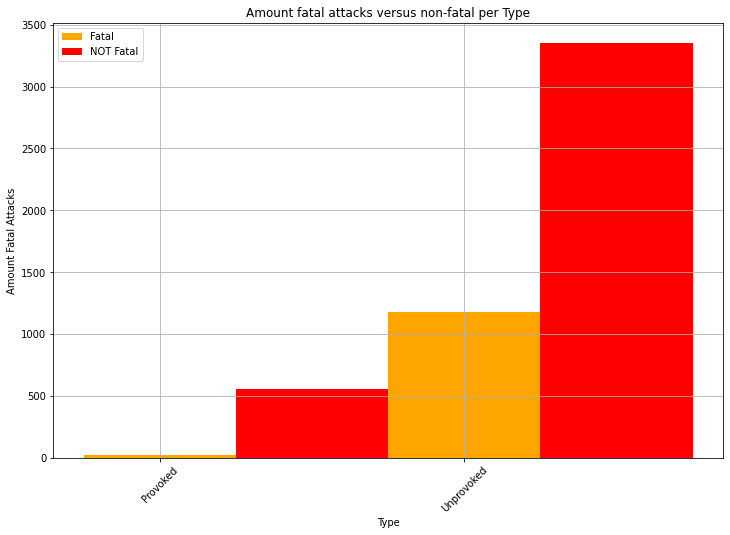

In [22]:
# display(groupedFatal.index)
fig, ax = plt.subplots()
x = np.arange(len(groupedFatal.index))
y = groupedFatal.loc[:,"FatalInt"]
y2 = groupedFatal.loc[:,"NotFatalInt"]
width1 = 0.5

plt.bar(x, y, width = width1,color='orange',label="Fatal")
plt.bar(x+width1, y2, width = width1,color='red',label="NOT Fatal")
plt.xticks(x, groupedFatal.index)
ax.set_xlabel("Type")
plt.xticks(rotation = 45) 
ax.set_ylabel("Amount Fatal Attacks")
plt.legend()
plt.grid()
fig.set_size_inches(12,8)
ax.set_title("Amount fatal attacks versus non-fatal per Type")

,Fatal,Not Fatal
0,3.502627,96.497373
1,26.048565,73.951435


Text(0.5, 1.0, 'Percentage fatal attacks versus non-fatal per Type')

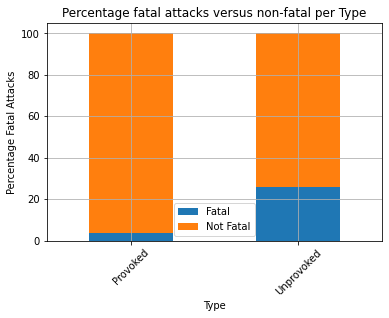

In [33]:
#Nu percentueel
# display(groupedFatal.loc[:,"FatalInt"]+groupedFatal.loc[:,"NotFatalInt"])
total = groupedFatal.loc[:,"FatalInt"].sum()+groupedFatal.loc[:,"NotFatalInt"].sum()
totalprovoked = groupedFatal.loc["Provoked","FatalInt"] + groupedFatal.loc["Provoked","NotFatalInt"]
totalunprovoked = groupedFatal.loc["Unprovoked","FatalInt"] + groupedFatal.loc["Unprovoked","NotFatalInt"]

y1 = [(groupedFatal.loc["Provoked","FatalInt"]/totalprovoked)*100 , (groupedFatal.loc["Unprovoked","FatalInt"]/totalunprovoked)*100]
y2 = [(groupedFatal.loc["Provoked","NotFatalInt"]/totalprovoked)*100 , (groupedFatal.loc["Unprovoked","NotFatalInt"]/totalunprovoked)*100]
y = pd.DataFrame({'Fatal': y1,
                  'Not Fatal': y2})
# display(y1)
display(y)

ax = y.plot(kind='bar', ylabel="Percentage Fatal Attacks", xlabel = "Type", stacked=True)
plt.xticks(np.arange(len(groupedFatal.index)),groupedFatal.index)
plt.xticks(rotation = 45) 
ax.legend()
ax.grid()
fig.set_size_inches(12,8)
ax.set_title("Percentage fatal attacks versus non-fatal per Type")

In [ ]:
#4 Are certain activities more likely to result in a shark attack?
#Hiervoor moet ik ook de kolom Activity nog onderzoeken
unieke_waarden_per_kolom("Activity")
look_at_edges("Activity")
cast_to_type(df["Activity"],"string")
display(df["Activity"].value_counts(dropna=False))

In [72]:
df["Activity"] = df["Activity"].replace({' ':None,'   ':None,np.nan:None,'.':None})

(-0.5, 399.5, 199.5, -0.5)

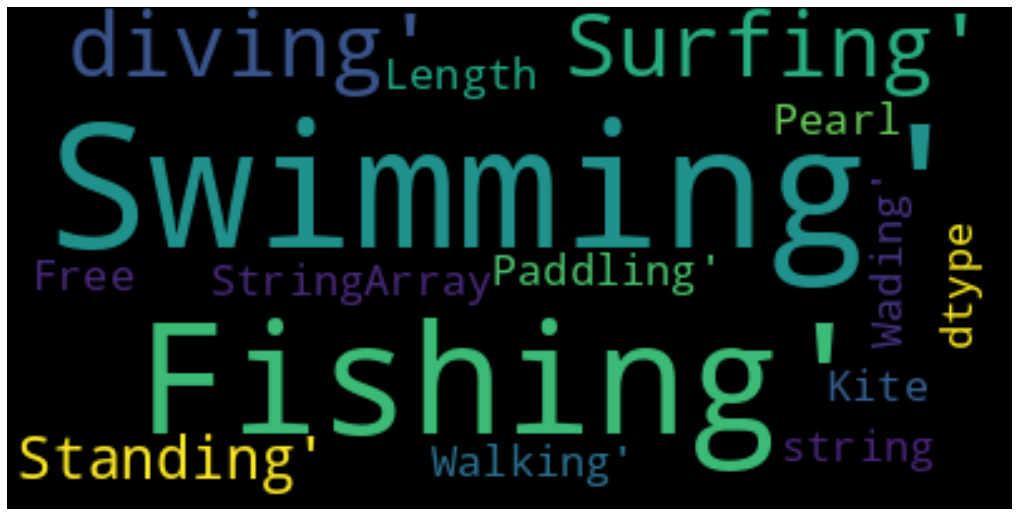

In [168]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 60)
#Behoorlijk wat NaN waarden, die ik niet mee kan nemen in deze analyse
#We beginnen eens met een woordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
dfwordcloud = df.dropna(subset=["Activity"]).copy()
dfwordcloud['Activity'] = dfwordcloud["Activity"].astype('string')
dfwordcloud['Activity'] = dfwordcloud["Activity"].str.strip('\"')
dfwordcloud['Activity'] = dfwordcloud["Activity"].str.strip("\'")

# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
cloudvalues = dfwordcloud["Activity"].values
wordcloud = WordCloud(stopwords=stopwords).generate(str(cloudvalues))

# Display the generated image:
plt.figure( figsize=(18,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#Eerste voorzichtige conclusie: Swimming, Fishing, Surfing

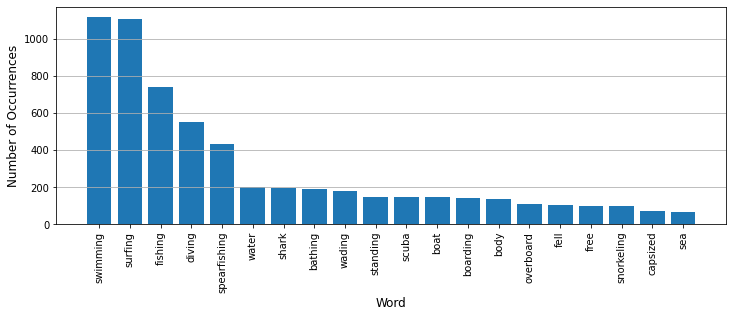

In [196]:
#Nu plotten naar aantallen en we kijken naar de woorden afzonderlijk (geen stopwords)
dfwordcloud["Activity"] = dfwordcloud["Activity"].str.lower()
cnt_pro = dfwordcloud["Activity"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
#Alles naar losse woorden en tellen
cnt_pro = cnt_pro.str.findall(r"(\w+)").explode().value_counts()
cnt_pro = pd.DataFrame(cnt_pro).reset_index()

top20 = cnt_pro.nlargest(20,"Activity")
plt.figure(figsize=(12,4))
plt.bar(top20["index"],top20["Activity"])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show();